In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer= optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
#Setting aside a validation set

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 87ms/step - loss: 0.5882 - acc: 0.7073 - val_loss: 0.3771 - val_acc: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3078 - acc: 0.9101 - val_loss: 0.3010 - val_acc: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2166 - acc: 0.9319 - val_loss: 0.2915 - val_acc: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1663 - acc: 0.9509 - val_loss: 0.2738 - val_acc: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1329 - acc: 0.9588 - val_loss: 0.2858 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1049 - acc: 0.9690 - val_loss: 0.3110 - val_acc: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0902 - acc: 0.9751 - val_loss: 0.3166 - val_acc: 0.8822
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0706 - a

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

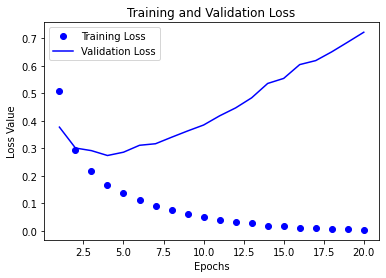

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.5900 - accuracy: 0.7016
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.3098 - accuracy: 0.9030
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2186 - accuracy: 0.9253
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2860 - accuracy: 0.8869


In [23]:
print(results)

[0.28596067428588867, 0.8869199752807617]


In [18]:
model.fit(partial_x_train,
                         partial_y_train,
                         epochs=3,
                         batch_size=512,
                         validation_data=(x_val, y_val))

Epoch 1/3
30/30 [==============================] - 1s 47ms/step - loss: 0.0069 - acc: 0.9983 - val_loss: 0.7510 - val_acc: 0.8630
Epoch 2/3
30/30 [==============================] - 1s 36ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.7861 - val_acc: 0.8639
Epoch 3/3
30/30 [==============================] - 1s 33ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.8140 - val_acc: 0.8630


In [19]:
#Model Evaluation

In [22]:
np.set_printoptions(suppress=True)
result = model.predict(x_test)


In [23]:
result

array([[0.00249463],
       [1.        ],
       [0.9972355 ],
       ...,
       [0.00354388],
       [0.00631037],
       [0.6564003 ]], dtype=float32)

In [25]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [27]:
mae

0.1518